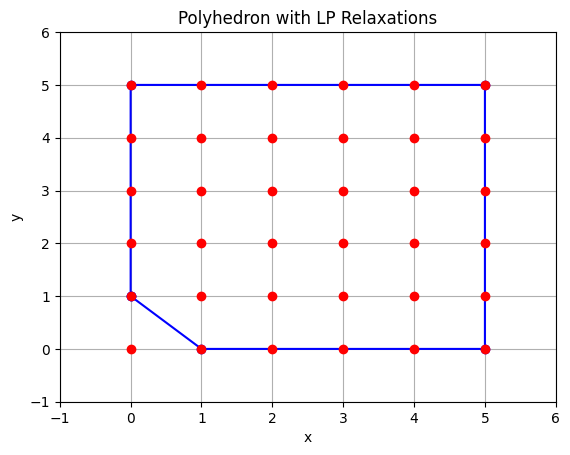

In [8]:
import numpy as np

import matplotlib.pyplot as plt

# Define the vertices of the polyhedron
vertices = np.array([[0, 1],[1,0], [5, 0], [5, 5], [0, 5],[0,1]])

# Create the plot
fig, ax = plt.subplots()
ax.plot(vertices[:, 0], vertices[:, 1], 'bo-')  # Draw the polyhedron

# Draw dots at each integer point
for x in range(6):
	for y in range(6):
		ax.plot(x, y, 'ro')

# Set the scale of the axes
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 6)

# Add grid
ax.grid(True)

# Add labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Polyhedron with LP Relaxations')

plt.savefig('lp_relaxed_polyhedron.png')
plt.show()

# Additional Problem 5.5

## Part c

In [37]:
import cvxpy as cp
import numpy as np

n = 5
m = 5

x = cp.Variable(n)
z = cp.Variable()

p = np.array([
    0.50, 0.60, 0.60, 0.60, 0.20
])

q = np.array([
    10, 5, 5, 20, 10
])

S = [
    [1,2],
    [4],
    [1,4,5],
    [2,5],
    [3]
]

Z = np.zeros((m,n))

for i, arr in enumerate(S):
    for val in arr:
        Z[val-1,i] = 1
        

constraints = [z * np.ones(n) >= Z @ x,
               x >= 0,
               x <= q]


obj = cp.Maximize( p.T @ x - z)

prob_wc = cp.Problem(obj, constraints)

constraints_q = [z * np.ones(n) >= Z @ x,
               x >= 0,
               x == q]

prob_q = cp.Problem(obj, constraints_q)

print(f"The optimal worst case profit is {prob_wc.solve()}")
print(f"The worst case profit if all qs are accepted is {prob_q.solve()}")
print(f"Dual variables: {constraints[0].dual_value}")

The optimal worst case profit is 3.4999999940788573
The worst case profit if all qs are accepted is -5.0000000004228475
Dual variables: [0.08899928 0.41100072 0.11154698 0.19945374 0.18899928]


# Additional Problem 5.6

Optimal value for the relaxation: -35.771505104360934
First 5 values of x_relaxed = [1.00000000e+00 9.99999999e-01 4.97239475e-11 5.83447106e-11
 5.16880666e-09]


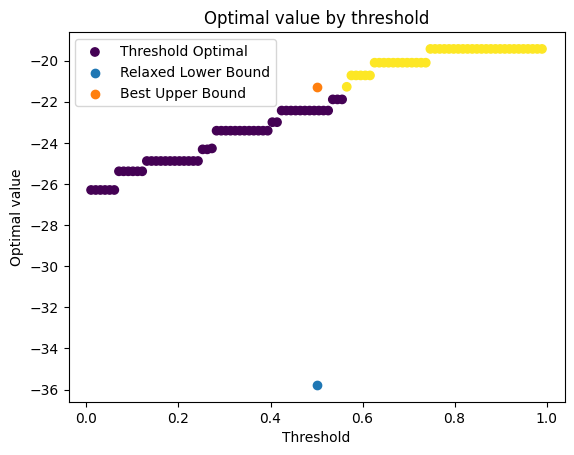

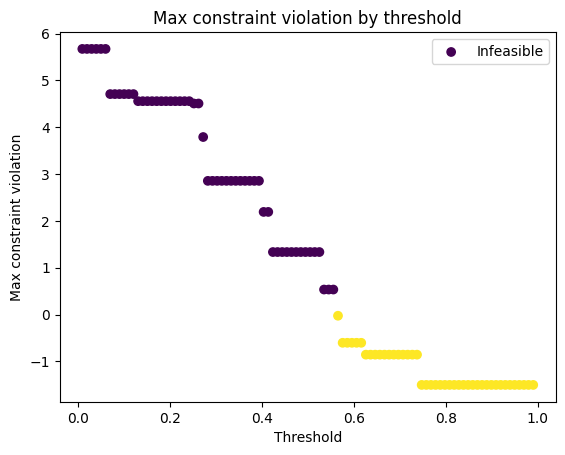

In [193]:
#Problem data
n = 100
m = 300
A = np.random.rand(m,n) #uniform random distribution [0,1] where each entry i,j is the amount of resource i consumed by accepting job j
b = A @ np.ones(n) / 2 #Amount of resource j available
c = -np.random.rand(n) #Revenue associated with accepting a job

x_rlx = cp.Variable(n) # 0 if not accepting job j and 1 if accepting job j

#Solution

constraints = [
    A @ x_rlx <= b,
    x_rlx >= 0,
    x_rlx <= 1
]

obj = cp.Minimize(c.T @ x_rlx)

prob = cp.Problem(obj, constraints)

opt_rlx = prob.solve()

print(f"Optimal value for the relaxation: {opt_rlx}")
print(f"First 5 values of x_relaxed = {x_rlx.value[:5]}")

# Thresholding
t_arr = np.linspace(0,1, 100)

def threshold_map(x:cp.Variable,t):
    return (x.value > t).astype(np.float32)

x_hats = [threshold_map(x,t) for t in t_arr]

#Solving each x_hat
a_dict = {
    "obj_val": None,
    "x_hat": None,
    "max_cons_vio": None,
    'threshold': None,
    'feasible': None
}
problem_solutions = [a_dict for _ in range(100)]

obj_vals = []
max_cons_vios = []

feasibles = []

for i, x_hat in enumerate(x_hats):
	obj_val = c.T @ x_hat
	max_cons_vio = np.max(A @ x_hat - b)
      
	feasible = 1 if np.all(A @ x_hat <= b) else 0

	problem_solutions[i]['obj_val'] = obj_val
	problem_solutions[i]['x_hat'] = x_hat
	problem_solutions[i]['max_cons_vio'] = max_cons_vio
	problem_solutions[i]['threshold'] = t_arr[i]
      
    
	obj_vals.append(obj_val)
	max_cons_vios.append(max_cons_vio)
	feasibles.append(feasible)
      

U = np.min(obj_vals[1:-1] * np.array(feasibles[1:-1]))

#Plotting and results
import matplotlib.pyplot as plt

plt.scatter(t_arr[1:-1], obj_vals[1:-1],c=feasibles[1:-1],label="Threshold Optimal")
plt.scatter(0.5, opt_rlx, label="Relaxed Lower Bound")
plt.scatter(0.5, U,label="Best Upper Bound")
plt.title("Optimal value by threshold")
plt.xlabel("Threshold")
plt.ylabel("Optimal value")
plt.legend()
plt.show()

plt.scatter(t_arr[1:-1], max_cons_vios[1:-1],c=feasibles[1:-1])
plt.title("Max constraint violation by threshold")
plt.xlabel("Threshold")
plt.ylabel("Max constraint violation")
plt.legend(["Infeasible"])
plt.show()

In [127]:
feasibles

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]